In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
hyderabad_meteo = pd.read_csv('/kaggle/input/telangana-aqi/Telengana/Metrological Data/Hyderabad.csv', delimiter=',')
hyderabad_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.8,98,0.0,955.7,7.6,12.8,87,122
1,2024-01-01T01:00,15.0,98,0.0,957.2,7.9,15.0,114,134
2,2024-01-01T02:00,16.7,96,0.0,958.2,5.8,15.3,120,139
3,2024-01-01T03:00,19.6,84,0.0,959.3,6.9,13.3,133,142
4,2024-01-01T04:00,22.3,72,0.0,960.0,8.9,12.2,133,135
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,23.0,67,0.0,958.7,5.2,11.2,88,80
8780,2024-12-31T20:00,22.5,69,0.0,957.7,5.2,11.6,68,69
8781,2024-12-31T21:00,22.0,72,0.0,957.0,5.3,11.9,62,63
8782,2024-12-31T22:00,21.4,74,0.0,956.4,5.5,12.5,49,55


In [3]:
hyderabad_meteo['time'] = pd.to_datetime(hyderabad_meteo['time'])
hyderabad_meteo.set_index("time", inplace=True)
hyderabad_meteo = hyderabad_meteo.resample('D').mean().reset_index()
hyderabad_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01,21.270833,71.000000,0.000,956.966667,7.816667,15.150000,114.666667,122.333333
1,2024-01-02,20.879167,73.958333,0.000,956.345833,9.079167,16.691667,113.750000,120.166667
2,2024-01-03,21.820833,70.875000,0.000,955.891667,11.645833,20.412500,125.083333,127.333333
3,2024-01-04,22.037500,68.708333,0.000,955.995833,11.687500,20.666667,124.583333,127.083333
4,2024-01-05,21.316667,67.750000,0.000,956.116667,11.120833,20.175000,129.416667,131.541667
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,22.725000,75.583333,0.075,959.041667,11.400000,20.516667,125.708333,127.750000
362,2024-12-28,23.283333,71.083333,0.000,958.341667,8.741667,16.183333,136.500000,138.250000
363,2024-12-29,24.012500,63.500000,0.000,958.487500,6.737500,12.987500,111.208333,117.875000
364,2024-12-30,24.787500,53.416667,0.000,958.620833,5.695833,11.004167,86.875000,91.458333


In [4]:
hyderabad_pollutants = pd.read_csv('/kaggle/input/telangana-aqi/Telengana/Pollutants/Hyderabad.csv', delimiter= ',')
hyderabad_pollutants['Timestamp'] = hyderabad_meteo['time']
hyderabad_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
hyderabad_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,45.91,88.96,7.76,16.29,15.34,12.21,7.90,0.66,26.67,...,0.88,22.44,65.51,0.71,153.73,0.0,0.0,94.66,714.34,-0.80
1,2024-01-02,45.56,95.51,21.46,31.00,19.20,13.03,7.77,0.62,34.32,...,0.90,22.24,68.94,0.80,145.26,0.0,0.0,98.79,714.05,-0.76
2,2024-01-03,53.89,93.15,6.61,15.95,14.57,13.04,8.66,0.67,31.08,...,0.76,22.76,65.69,0.86,150.44,0.0,0.0,103.12,713.91,-0.74
3,2024-01-04,80.67,87.19,5.94,14.76,14.98,12.45,7.85,0.76,28.07,...,0.76,23.32,64.90,0.89,152.14,0.0,0.0,118.89,714.03,-0.98
4,2024-01-05,38.43,79.43,5.33,15.16,14.53,12.42,7.64,0.67,28.65,...,0.95,23.03,61.14,0.95,157.67,0.0,0.0,98.53,714.00,-0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,29.87,72.43,7.98,16.65,16.60,13.28,8.24,0.74,21.59,...,0.86,24.05,78.88,0.85,152.98,0.0,0.0,57.89,720.00,-0.49
362,2024-12-28,37.19,88.20,8.58,18.37,18.72,14.17,7.88,0.94,23.98,...,0.83,24.28,72.78,0.76,164.63,0.0,0.0,109.69,718.68,-0.48
363,2024-12-29,39.79,85.68,8.96,21.32,20.81,14.38,8.59,0.75,23.39,...,0.81,24.22,70.79,0.67,151.45,0.0,0.0,123.33,719.06,-0.50
364,2024-12-30,39.60,97.67,8.97,21.72,20.81,14.06,9.23,0.80,23.06,...,0.88,24.89,63.23,0.50,153.68,0.0,0.0,118.49,718.45,-0.49


In [5]:
hyderabad = pd.merge(hyderabad_meteo.iloc[:, :], hyderabad_pollutants.iloc[:, 0:3], on='time')
hyderabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01,21.270833,71.000000,0.000,956.966667,7.816667,15.150000,114.666667,122.333333,45.91,88.96
1,2024-01-02,20.879167,73.958333,0.000,956.345833,9.079167,16.691667,113.750000,120.166667,45.56,95.51
2,2024-01-03,21.820833,70.875000,0.000,955.891667,11.645833,20.412500,125.083333,127.333333,53.89,93.15
3,2024-01-04,22.037500,68.708333,0.000,955.995833,11.687500,20.666667,124.583333,127.083333,80.67,87.19
4,2024-01-05,21.316667,67.750000,0.000,956.116667,11.120833,20.175000,129.416667,131.541667,38.43,79.43
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,22.725000,75.583333,0.075,959.041667,11.400000,20.516667,125.708333,127.750000,29.87,72.43
362,2024-12-28,23.283333,71.083333,0.000,958.341667,8.741667,16.183333,136.500000,138.250000,37.19,88.20
363,2024-12-29,24.012500,63.500000,0.000,958.487500,6.737500,12.987500,111.208333,117.875000,39.79,85.68
364,2024-12-30,24.787500,53.416667,0.000,958.620833,5.695833,11.004167,86.875000,91.458333,39.60,97.67


In [6]:
hyderabad['city'] = 'Hyderabad'
hyderabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01,21.270833,71.000000,0.000,956.966667,7.816667,15.150000,114.666667,122.333333,45.91,88.96,Hyderabad
1,2024-01-02,20.879167,73.958333,0.000,956.345833,9.079167,16.691667,113.750000,120.166667,45.56,95.51,Hyderabad
2,2024-01-03,21.820833,70.875000,0.000,955.891667,11.645833,20.412500,125.083333,127.333333,53.89,93.15,Hyderabad
3,2024-01-04,22.037500,68.708333,0.000,955.995833,11.687500,20.666667,124.583333,127.083333,80.67,87.19,Hyderabad
4,2024-01-05,21.316667,67.750000,0.000,956.116667,11.120833,20.175000,129.416667,131.541667,38.43,79.43,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,22.725000,75.583333,0.075,959.041667,11.400000,20.516667,125.708333,127.750000,29.87,72.43,Hyderabad
362,2024-12-28,23.283333,71.083333,0.000,958.341667,8.741667,16.183333,136.500000,138.250000,37.19,88.20,Hyderabad
363,2024-12-29,24.012500,63.500000,0.000,958.487500,6.737500,12.987500,111.208333,117.875000,39.79,85.68,Hyderabad
364,2024-12-30,24.787500,53.416667,0.000,958.620833,5.695833,11.004167,86.875000,91.458333,39.60,97.67,Hyderabad


In [7]:
hyderabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_10m (°)    366 non-null    float64       
 8   wind_direction_100m (°)   366 non-null    float64       
 9   PM2.5 (µg/m³)             366 non-null    float64       
 10  PM10 (µg/m³)              366 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    hyderabad[delay1_col] = hyderabad[col].shift(1)
    delay2_col = col + "_delay2"
    hyderabad[delay2_col] = hyderabad[col].shift(2)
    hyderabad.loc[0, delay1_col] = hyderabad[col].iloc[-1]
    hyderabad.loc[1, delay2_col] = hyderabad[col].iloc[-1]
    hyderabad.loc[0, delay2_col] = hyderabad[col].iloc[-2]

hyderabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,21.270833,71.000000,0.000,956.966667,7.816667,15.150000,114.666667,122.333333,45.91,88.96,Hyderabad,44.50,39.60,101.63,97.67
1,2024-01-02,20.879167,73.958333,0.000,956.345833,9.079167,16.691667,113.750000,120.166667,45.56,95.51,Hyderabad,45.91,44.50,88.96,101.63
2,2024-01-03,21.820833,70.875000,0.000,955.891667,11.645833,20.412500,125.083333,127.333333,53.89,93.15,Hyderabad,45.56,45.91,95.51,88.96
3,2024-01-04,22.037500,68.708333,0.000,955.995833,11.687500,20.666667,124.583333,127.083333,80.67,87.19,Hyderabad,53.89,45.56,93.15,95.51
4,2024-01-05,21.316667,67.750000,0.000,956.116667,11.120833,20.175000,129.416667,131.541667,38.43,79.43,Hyderabad,80.67,53.89,87.19,93.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,22.725000,75.583333,0.075,959.041667,11.400000,20.516667,125.708333,127.750000,29.87,72.43,Hyderabad,25.30,21.40,60.24,65.50
362,2024-12-28,23.283333,71.083333,0.000,958.341667,8.741667,16.183333,136.500000,138.250000,37.19,88.20,Hyderabad,29.87,25.30,72.43,60.24
363,2024-12-29,24.012500,63.500000,0.000,958.487500,6.737500,12.987500,111.208333,117.875000,39.79,85.68,Hyderabad,37.19,29.87,88.20,72.43
364,2024-12-30,24.787500,53.416667,0.000,958.620833,5.695833,11.004167,86.875000,91.458333,39.60,97.67,Hyderabad,39.79,37.19,85.68,88.20


In [9]:
telangana_data = hyderabad
telangana_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,21.270833,71.000000,0.000,956.966667,7.816667,15.150000,114.666667,122.333333,45.91,88.96,Hyderabad,44.50,39.60,101.63,97.67
1,2024-01-02,20.879167,73.958333,0.000,956.345833,9.079167,16.691667,113.750000,120.166667,45.56,95.51,Hyderabad,45.91,44.50,88.96,101.63
2,2024-01-03,21.820833,70.875000,0.000,955.891667,11.645833,20.412500,125.083333,127.333333,53.89,93.15,Hyderabad,45.56,45.91,95.51,88.96
3,2024-01-04,22.037500,68.708333,0.000,955.995833,11.687500,20.666667,124.583333,127.083333,80.67,87.19,Hyderabad,53.89,45.56,93.15,95.51
4,2024-01-05,21.316667,67.750000,0.000,956.116667,11.120833,20.175000,129.416667,131.541667,38.43,79.43,Hyderabad,80.67,53.89,87.19,93.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,22.725000,75.583333,0.075,959.041667,11.400000,20.516667,125.708333,127.750000,29.87,72.43,Hyderabad,25.30,21.40,60.24,65.50
362,2024-12-28,23.283333,71.083333,0.000,958.341667,8.741667,16.183333,136.500000,138.250000,37.19,88.20,Hyderabad,29.87,25.30,72.43,60.24
363,2024-12-29,24.012500,63.500000,0.000,958.487500,6.737500,12.987500,111.208333,117.875000,39.79,85.68,Hyderabad,37.19,29.87,88.20,72.43
364,2024-12-30,24.787500,53.416667,0.000,958.620833,5.695833,11.004167,86.875000,91.458333,39.60,97.67,Hyderabad,39.79,37.19,85.68,88.20


In [10]:
telangana_data['city'] = telangana_data['city'].astype('category')

In [11]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [12]:
X, y = telangana_data[input_cols], telangana_data[target_cols]

In [13]:
from xgboost import XGBRegressor

In [14]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=20,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [15]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
pred_check = model.predict(X)

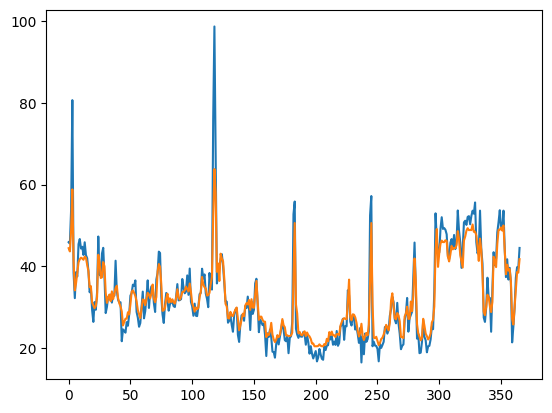

In [17]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.8798170544209575


In [19]:
import joblib
joblib.dump(model, 'Telangana_PM25.pkl')

['Telangana_PM25.pkl']

In [20]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
pred_check2 = model.predict(X)

In [22]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9486224224750114


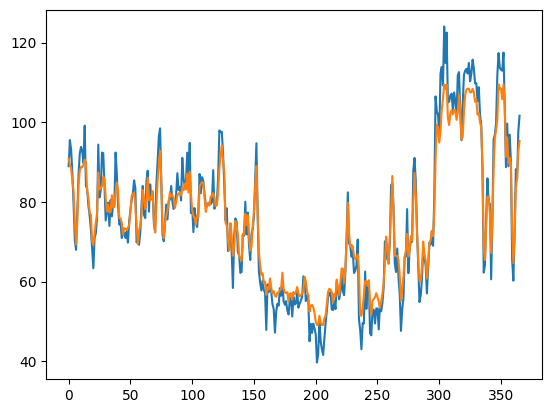

In [23]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [24]:
joblib.dump(model, 'Telangana_PM10.pkl')

['Telangana_PM10.pkl']